In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, metrics
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from IPython.display import Image

In [2]:
# 建立 dataframe

dic = {
    "col 1": [1,2,3,4,5,6,7,8,9,10], 
    "col 2": [5,48,20,69,88,14,32,39,50,9],
    "col 3": [1,1,0,1,1,0,0,0,1,0],
    "col 4": [0,3,3,4,2,2,4,4,1,0],

}
df = pd.DataFrame(dic)
df

,col 1,col 2,col 3,col 4
0,1,5,1,0
1,2,48,1,3
2,3,20,0,3
3,4,69,1,4
4,5,88,1,2
5,6,14,0,2
6,7,32,0,4
7,8,39,0,4
8,9,50,1,1
9,10,9,0,0


6675.5
2043.0833333333335
607.25
416.0
233.0
125.5
76.0
47.5


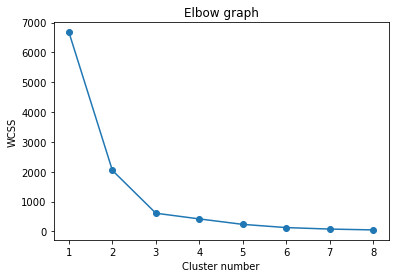

In [3]:
# 計算 wcss 損失函數

wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(np.array(df[df.columns]))
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,9), wcss, marker='o')
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

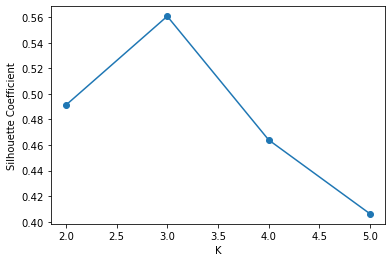

In [4]:
# 計算輪廓系數

Scores = []
for i in range(2,6):
    kmeans = cluster.KMeans(n_clusters=i, random_state=42).fit(np.array(df[df.columns]))
    silhouette_avg = metrics.silhouette_score(np.array(df[df.columns]),kmeans.labels_)
    Scores.append(silhouette_avg)

plt.plot(range(2,6), Scores, marker='o')

plt.xlabel('K')
plt.ylabel('Silhouette Coefficient') 
plt.show()

In [5]:
k = 3
kmeans = KMeans(n_clusters=k).fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(df)
df['cluster'] = labels
display(df.sort_values(by='cluster'))
#各分類數量
display(df['cluster'].value_counts())

,col 1,col 2,col 3,col 4,cluster
1,2,48,1,3,0
6,7,32,0,4,0
7,8,39,0,4,0
8,9,50,1,1,0
0,1,5,1,0,1
2,3,20,0,3,1
5,6,14,0,2,1
9,10,9,0,0,1
3,4,69,1,4,2
4,5,88,1,2,2


1    4
0    4
2    2
Name: cluster, dtype: int64

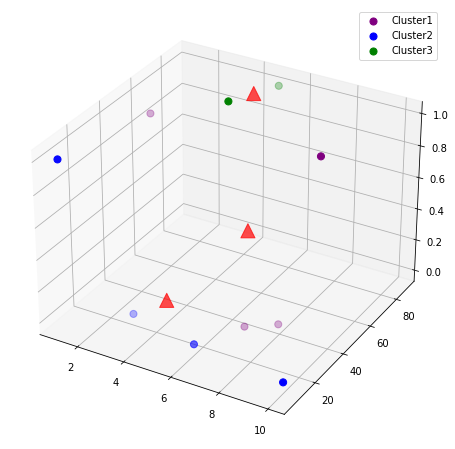

In [7]:
from mpl_toolkits.mplot3d import Axes3D

colors=['purple', 'blue', 'green', 'gold']
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111, projection='3d')
for i in range(kmeans.n_clusters):
    df_cluster=df[df['cluster']==i]
    ax.scatter(df_cluster['col 1'], df_cluster['col 2'],df_cluster['col 3'],s=50,label='Cluster'+str(i+1), c=colors[i])
plt.legend()

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=200,marker='^', c='red', alpha=0.7, label='Centroids')